In [4]:
from drop_lib2 import *
from scipy.io import loadmat
import pickle
from sklearn.ensemble import HistGradientBoostingClassifier

directory = 'ts_fresh_eff'
verbose = 1
data = load_data(verbose=verbose)

Loaded segments shape: (842, 25000)
Speed labels shape: (842,)
Volume labels shape: (842,)
Unique speeds: [1.72 2.08 2.36 2.64 3.13 3.39 3.42]
Unique volumes: [55 77]


In [5]:
# Load the extracted features from the pickle file
# Features takes a very(!) long time to extract, so we precompute them
# and save them in a pickle file.
with open(directory + '/extracted_features.pkl', 'rb') as file:
    extracted_features = pickle.load(file).to_numpy()
X = extracted_features

 20%|██        | 1/5 [00:15<01:01, 15.45s/it]

Velocity accuracy (fold): 0.9231


 40%|████      | 2/5 [00:33<00:51, 17.10s/it]

Velocity accuracy (fold): 0.9349


 60%|██████    | 3/5 [00:50<00:33, 16.81s/it]

Velocity accuracy (fold): 0.9048


 80%|████████  | 4/5 [01:08<00:17, 17.41s/it]

Velocity accuracy (fold): 0.9226


100%|██████████| 5/5 [01:23<00:00, 16.74s/it]


Velocity accuracy (fold): 0.9048
Velocity accuracy average across all folds: 0.9180±0.0117


 20%|██        | 1/5 [00:05<00:22,  5.59s/it]

Volume accuracy (fold): 0.9231


 40%|████      | 2/5 [00:11<00:16,  5.64s/it]

Volume accuracy (fold): 0.9231


 60%|██████    | 3/5 [00:16<00:11,  5.63s/it]

Volume accuracy (fold): 0.9286


 80%|████████  | 4/5 [00:22<00:05,  5.70s/it]

Volume accuracy (fold): 0.9464


100%|██████████| 5/5 [00:29<00:00,  5.83s/it]

Volume accuracy (fold): 0.9345
Volume accuracy average across all folds - : 0.9311±0.0087
Results saved in directory: ./ts_fresh_eff/
[[ 95   1   5   0   0   2   0]
 [  0 118   0   0   0   4   0]
 [  1   0 109   1   0   2   0]
 [  0   0   1 180   0   1   0]
 [  0   0   0   1  64   0  23]
 [  3   0   1   4   0 133   1]
 [  0   0   1   0  17   0  74]]
[[338  31]
 [ 27 446]]


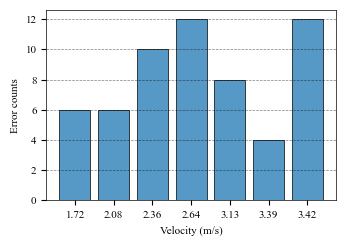

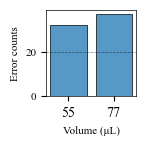

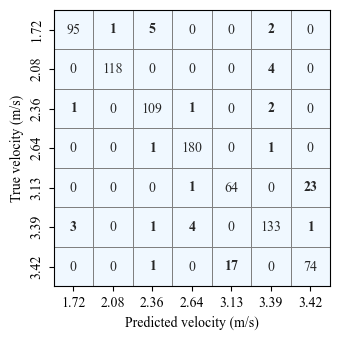

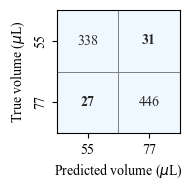

In [6]:
classifier = HistGradientBoostingClassifier(max_iter=250,
                                            max_depth=50,
                                            random_state=42)
confusion_matrices_speed, error_indices_speed, all_cv_scores_speed, \
    confusion_matrices_volume, error_indices_volume, all_cv_scores_volume \
    = evaluate_classifier(classifier, classifier, X, data, random_state=42)
save_results(confusion_matrices_speed, error_indices_speed, all_cv_scores_speed,
             confusion_matrices_volume, error_indices_volume, all_cv_scores_volume,
             data,
             directory=directory, verbose=verbose)
plot_results(confusion_matrices_speed, error_indices_speed,
             confusion_matrices_volume, error_indices_volume,
             data,
             directory=directory, verbose=verbose)